In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download data

In [2]:
df_beha = pd.read_csv('../../data/Behavioral/AllData.csv')#, nrows=1000)

df_psd_cluster = pd.read_csv("../../data/EEG/RestingEEG_PSD_Cluster.csv") #, nrows=1000)
df_psd_channel = pd.read_csv("../../data/EEG/RestingEEG_PSD_Channel.csv") #, nrows=5)
df_spectro_cluster = pd.read_csv("../../data/EEG/RestingEEG_Spectro_Cluster.csv") #, nrows=1000)
df_spectro_channel = pd.read_csv("../../data/EEG/RestingEEG_Spectro_Channel.csv") #, nrows=5)

df_microstate = pd.read_csv("../../data/EEG/RestingEEG_Microstates.csv") #, nrows=5)

/home/tristan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1

# Look at Data

## Behavioral data

In [3]:
# Extract relevant info from the Behavioral data 
y_labels = df_beha[["Patient_ID", "Age", "DX_01_Cat"]]
y_labels_healthy = y_labels[y_labels["DX_01_Cat"].str.contains("No Diagnosis Given") == True]

y_labels = y_labels[["Patient_ID", "Age"]]
y_labels_healthy = y_labels_healthy[["Patient_ID", "Age"]]
y_labels_healthy

,Patient_ID,Age
9,NDARCF462HNM,14.216632
11,NDARFC233RND,9.153661
22,NDARDT800YVF,17.510381
25,NDARZT011LBZ,7.760209
26,NDARKV482FU9,10.977298
...,...,...
2088,NDARAV069HGT,13.896189
2089,NDARZC497BFU,17.419917
2090,NDARDZ737LG9,13.031143
2094,NDARRT283RHB,10.712069


## Power Sepectrum Cluster data

In [4]:
### Extract relevant info from the power spectral density of EEG data

## Front part of the skull

# Left front of the skull
df_psd_cluster_lfront = df_psd_cluster.filter(regex='lfront')
df_psd_cluster_lfront_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_lfront.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_lfront_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_lfront.filter(regex='eyesopen')], axis=1)

df_psd_cluster_lfront_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_lfront_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Middle front of the skull
df_psd_cluster_mfront = df_psd_cluster.filter(regex='mfront')
df_psd_cluster_mfront_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_mfront.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_mfront_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_mfront.filter(regex='eyesopen')], axis=1)

df_psd_cluster_mfront_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_mfront_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Right front of the skull
df_psd_cluster_rfront = df_psd_cluster.filter(regex='rfront')
df_psd_cluster_rfront_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_rfront.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_rfront_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_rfront.filter(regex='eyesopen')], axis=1)

df_psd_cluster_rfront_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_rfront_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

## Parietal part of the skull

# Left parietal part of the skull
df_psd_cluster_lpari = df_psd_cluster.filter(regex='lpari')
df_psd_cluster_lpari_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_lpari.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_lpari_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_lpari.filter(regex='eyesopen')], axis=1)

df_psd_cluster_lpari_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_lpari_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Middle parietal part of the skull
df_psd_cluster_mpari = df_psd_cluster.filter(regex='mpari')
df_psd_cluster_mpari_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_mpari.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_mpari_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_mpari.filter(regex='eyesopen')], axis=1)

df_psd_cluster_mpari_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_mpari_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

# Right parietal part of the skull
df_psd_cluster_rpari = df_psd_cluster.filter(regex='rpari')
df_psd_cluster_rpari_eyesclosed = pd.concat([df_psd_cluster['id'], df_psd_cluster_rpari.filter(regex='eyesclosed')], axis=1)
df_psd_cluster_rpari_eyesopen = pd.concat([df_psd_cluster['id'], df_psd_cluster_rpari.filter(regex='eyesopen')], axis=1)

df_psd_cluster_rpari_eyesclosed.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_psd_cluster_rpari_eyesopen.rename(columns={'id': 'Patient_ID'}, inplace=True)

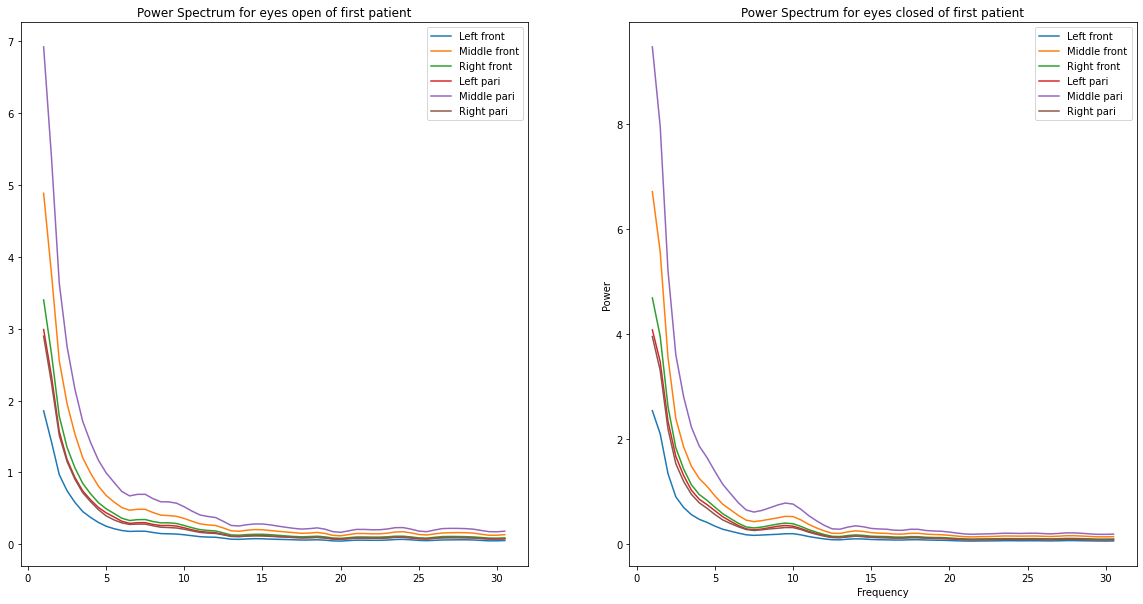

In [5]:
## Plot the power spectrums for first patient

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

freq = np.hstack((np.arange(1,58,0.5), np.arange(62.50,90.5,0.5)))

patient_sample = np.random.randint(0, high=len(df_psd_cluster_lfront_eyesopen.index), size=1)[0]
cut_frequency = 60

# Eyes open

power_lfront_eyesopen = np.asarray(df_psd_cluster_lfront_eyesopen.iloc[patient_sample,:])[1:]
power_mfront_eyesopen = np.asarray(df_psd_cluster_mfront_eyesopen.iloc[patient_sample,:])[1:]
power_rfront_eyesopen = np.asarray(df_psd_cluster_rfront_eyesopen.iloc[patient_sample,:])[1:]

power_lpari_eyesopen = np.asarray(df_psd_cluster_lpari_eyesopen.iloc[patient_sample,:])[1:]
power_mpari_eyesopen = np.asarray(df_psd_cluster_mpari_eyesopen.iloc[patient_sample,:])[1:]
power_rpari_eyesopen = np.asarray(df_psd_cluster_rpari_eyesopen.iloc[patient_sample,:])[1:]

plt.xlabel("Frequency")
plt.ylabel("Power")
ax1.set_title("Power Spectrum for eyes open of first patient")

ax1.plot(freq[:cut_frequency], power_lfront_eyesopen[:cut_frequency])
ax1.plot(freq[:cut_frequency], power_mfront_eyesopen[:cut_frequency])
ax1.plot(freq[:cut_frequency], power_rfront_eyesopen[:cut_frequency])

ax1.plot(freq[:cut_frequency], power_lpari_eyesopen[:cut_frequency])
ax1.plot(freq[:cut_frequency], power_mpari_eyesopen[:cut_frequency])
ax1.plot(freq[:cut_frequency], power_rpari_eyesopen[:cut_frequency])

ax1.legend(["Left front", "Middle front", "Right front", "Left pari", "Middle pari", "Right pari"])


# Eyes closed

power_lfront_eyesclosed = np.asarray(df_psd_cluster_lfront_eyesclosed.iloc[patient_sample,:])[1:]
power_mfront_eyesclosed = np.asarray(df_psd_cluster_mfront_eyesclosed.iloc[patient_sample,:])[1:]
power_rfront_eyesclosed = np.asarray(df_psd_cluster_rfront_eyesclosed.iloc[patient_sample,:])[1:]

power_lpari_eyesclosed = np.asarray(df_psd_cluster_lpari_eyesclosed.iloc[patient_sample,:])[1:]
power_mpari_eyesclosed = np.asarray(df_psd_cluster_mpari_eyesclosed.iloc[patient_sample,:])[1:]
power_rpari_eyesclosed = np.asarray(df_psd_cluster_rpari_eyesclosed.iloc[patient_sample,:])[1:]

plt.xlabel("Frequency")
plt.ylabel("Power")
ax2.set_title("Power Spectrum for eyes closed of first patient")

ax2.plot(freq[:cut_frequency], power_lfront_eyesclosed[:cut_frequency])
ax2.plot(freq[:cut_frequency], power_mfront_eyesclosed[:cut_frequency])
ax2.plot(freq[:cut_frequency], power_rfront_eyesclosed[:cut_frequency])

ax2.plot(freq[:cut_frequency], power_lpari_eyesclosed[:cut_frequency])
ax2.plot(freq[:cut_frequency], power_mpari_eyesclosed[:cut_frequency])
ax2.plot(freq[:cut_frequency], power_rpari_eyesclosed[:cut_frequency])

ax2.legend(["Left front", "Middle front", "Right front", "Left pari", "Middle pari", "Right pari"])



In [6]:
# Conclusion: we can remove part of the frequencies -> remove data -> prevent overfitting

## Spectro Cluster Data

In [7]:
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)

for col in df_spectro_cluster.columns:
    print(col) 

Patient_ID
eyesclosed_fband_delta_absmean_lfront
eyesclosed_fband_delta_absmean_mfront
eyesclosed_fband_delta_absmean_rfront
eyesclosed_fband_delta_absmean_lpari
eyesclosed_fband_delta_absmean_mpari
eyesclosed_fband_delta_absmean_rpari
eyesclosed_fband_delta_relmean_lfront
eyesclosed_fband_delta_relmean_mfront
eyesclosed_fband_delta_relmean_rfront
eyesclosed_fband_delta_relmean_lpari
eyesclosed_fband_delta_relmean_mpari
eyesclosed_fband_delta_relmean_rpari
eyesclosed_fband_theta_absmean_lfront
eyesclosed_fband_theta_absmean_mfront
eyesclosed_fband_theta_absmean_rfront
eyesclosed_fband_theta_absmean_lpari
eyesclosed_fband_theta_absmean_mpari
eyesclosed_fband_theta_absmean_rpari
eyesclosed_fband_theta_relmean_lfront
eyesclosed_fband_theta_relmean_mfront
eyesclosed_fband_theta_relmean_rfront
eyesclosed_fband_theta_relmean_lpari
eyesclosed_fband_theta_relmean_mpari
eyesclosed_fband_theta_relmean_rpari
eyesclosed_fband_alpha_absmean_lfront
eyesclosed_fband_alpha_absmean_mfront
eyesclosed_fb

## Microstate data

In [8]:
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)

for col in df_microstate.columns:
    print(col) 

Patient_ID
eyesclosed_microstates_gevtotal
eyesclosed_microstates_gfp_prototype1
eyesclosed_microstates_gfp_prototype2
eyesclosed_microstates_gfp_prototype3
eyesclosed_microstates_gfp_prototype4
eyesclosed_microstates_occurence_prototype1
eyesclosed_microstates_occurence_prototype2
eyesclosed_microstates_occurence_prototype3
eyesclosed_microstates_occurence_prototype4
eyesclosed_microstates_duration_prototype1
eyesclosed_microstates_duration_prototype2
eyesclosed_microstates_duration_prototype3
eyesclosed_microstates_duration_prototype4
eyesclosed_microstates_coverage_prototype1
eyesclosed_microstates_coverage_prototype2
eyesclosed_microstates_coverage_prototype3
eyesclosed_microstates_coverage_prototype4
eyesclosed_microstates_gev_prototype1
eyesclosed_microstates_gev_prototype2
eyesclosed_microstates_gev_prototype3
eyesclosed_microstates_gev_prototype4
eyesclosed_microstates_mspatcorr_prototype1
eyesclosed_microstates_mspatcorr_prototype2
eyesclosed_microstates_mspatcorr_prototype3
e

# Approach 1: Simple Linear Regression on intersection

## Aggregation of data

In [9]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)

df_psd_spe = pd.merge(df_psd_cluster, df_spectro_cluster, on='Patient_ID')
df_psd_spe_mic = pd.merge(df_psd_spe, df_microstate, on='Patient_ID')
print("Original length:")
print(len(df_psd_spe_mic))

df_psd_spe_mic_label = pd.merge(y_labels_healthy, df_psd_spe_mic, on='Patient_ID')
print("Only healthy people, resulting length:")
print(len(df_psd_spe_mic_label))

df_psd_spe_mic_label.dropna(inplace=True)
print("Drop Nan, resulting length:")
print(len(df_psd_spe_mic_label))

Original length:
1108
Only healthy people, resulting length:
128
Drop Nan, resulting length:
78


In [10]:
# Define Train and Test data 

# Parameters
test_ratio = 0.1

# Function
def train_test_split(dataframe, test_train_ratio):

    total_samples = len(dataframe.index)
    nsamples_test = int(test_train_ratio*total_samples)
    dataframe = dataframe.sample(frac=1).reset_index(drop=True)

    test = dataframe.iloc[:nsamples_test]
    X_test = test.drop(['Age'], axis=1)
    y_test = test[['Patient_ID', 'Age']]

    train = dataframe.iloc[nsamples_test:]
    X_train = train.drop(['Age'], axis=1)
    y_train = train[['Patient_ID','Age']]
    
    return X_train, y_train, X_test, y_test

# Result
(X_train_inter, y_train_inter, X_test_inter, y_test_inter) = \
                                                train_test_split(df_psd_spe_mic_label, test_ratio)

print("Length of the train set:")
print(len(y_train_inter))
print("Length of the test set:")
print(len(y_test_inter))

Length of the train set:
71
Length of the test set:
7


## Feature selection by correlation

In [11]:
# Parameters
nb_features_extracted = 20

# Function
def feature_select_by_correlation(X_train, y_train, nb_features):
    corr = X_train.corrwith(y_train['Age'], axis=0, method='pearson')
    feature_select = pd.DataFrame(corr.iloc[(-corr.abs()).argsort()][:nb_features])
    best_feature_names = feature_select.index.values
    
    return feature_select, best_feature_names

# Result
feature_select, best_feature_names = \
                        feature_select_by_correlation(X_train_inter, y_train_inter, nb_features_extracted)
feature_select

,0
eyesopen_psd_01dot00hz_mpari,-0.641387
eyesopen_psd_01dot50hz_mpari,-0.621063
eyesopen_psd_01dot00hz_lpari,-0.616369
eyesopen_fband_delta_absmean_mpari,-0.605859
eyesclosed_psd_01dot00hz_mpari,-0.604003
eyesopen_psd_02dot00hz_mfront,-0.599739
eyesopen_psd_01dot50hz_mfront,-0.597295
eyesclosed_psd_01dot00hz_rfront,-0.597016
eyesopen_fband_delta_absmean_mfront,-0.593677
eyesclosed_psd_01dot50hz_rfront,-0.592285


In [12]:
# Paramaters
nb_features_extracted = 5

# Function
def feature_selection_by_correlation(X_train, y_train, X_test, nb_features):
    feature_select, best_feature_names = feature_select_by_correlation(X_train, y_train, nb_features)
    best_feature_names = np.insert(best_feature_names, 0, 'Patient_ID')
    return X_train[best_feature_names], X_test[best_feature_names]

# Result
X_train_inter_feature_extracted, X_test_inter_feature_extracted = \
               feature_selection_by_correlation(X_train_inter, y_train_inter, X_test_inter, nb_features_extracted)

## Simple Linear Regression 

In [13]:
# Remove key for linear regression
X_train_inter_feature_extracted = X_train_inter_feature_extracted.drop(['Patient_ID'], axis=1, errors='ignore')
X_test_inter_feature_extracted = X_test_inter_feature_extracted.drop(['Patient_ID'], axis=1, errors='ignore')

y_train_inter = y_train_inter.drop(['Patient_ID'], axis=1, errors='ignore')
y_test_inter = y_test_inter.drop(['Patient_ID'], axis=1, errors='ignore')

In [14]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [15]:
# Tool function
def fit_simple_linear_regression(X_train_feature_extracted, y_train, nb_cv):

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train_feature_extracted, y_train)

    # Evaluate performance using cross-validation 
    scores = cross_val_score(regr, X_train_feature_extracted, y_train, scoring="neg_mean_squared_error", cv=nb_cv)
    train_mse = np.mean(-scores)

    # Results
    print("----- Train results -------")
    print('Coefficients: \n', regr.coef_)
    print('Mean squared error (cross-validation): %.2f'
          % train_mse)
    print()

    return regr, train_mse 

In [16]:
# Parameters
nb_cv = 10

# Function
def simple_linear_regression(X_train_feature_extracted, X_test_feature_extracted, y_train, y_test, nb_cv):

    regr, train_mse = fit_simple_linear_regression(X_train_feature_extracted, y_train, nb_cv)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test_feature_extracted)
    test_mse = mean_squared_error(y_test, y_pred)

    print("----- Test results --------")
    print("Number of test samples: ", len(y_pred))
    print('Mean squared error: %.2f'
          % test_mse)
    
    return regr, train_mse, test_mse

# Result
simple_linear_regression(X_train_inter_feature_extracted, X_test_inter_feature_extracted, \
                         y_train_inter, y_test_inter, nb_cv)

----- Train results -------
Coefficients: 
 [[-0.68685123  0.80737327 -0.14582214 -0.23761166 -0.04617383]]
Mean squared error (cross-validation): 6.16

----- Test results --------
Number of test samples:  7
Mean squared error: 14.24


(LinearRegression(), 6.159624725518399, 14.244353143346748)

# Approach 2: Simple Linear Regression on union (ensemble model)

## Prepare data sets

In [17]:
df_psd_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_spectro_cluster.rename(columns={'id': 'Patient_ID'}, inplace=True)
df_microstate.rename(columns={'id': 'Patient_ID'}, inplace=True)
print("Original lengths: " + str(len(df_psd_cluster)) + "(psd), " + \
     str(len(df_spectro_cluster)) + "(spectro), " + str(len(df_microstate)) + "(micro)")

# Aggregate with label
df_label_psd_cluster = pd.merge(y_labels, df_psd_cluster, on='Patient_ID')
df_label_spectro_cluster = pd.merge(y_labels_healthy, df_spectro_cluster, on='Patient_ID')
df_label_microstate = pd.merge(y_labels_healthy, df_microstate, on='Patient_ID')
print("Only healthy people, resulting lengths: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

# Drop NaN values
df_label_psd_cluster.dropna(inplace=True)
df_label_spectro_cluster.dropna(inplace=True)
df_label_microstate.dropna(inplace=True)
print("Drop NaN, resulting lenghts: " + str(len(df_label_psd_cluster)) + "(psd), " + \
     str(len(df_label_spectro_cluster)) + "(spectro), " + str(len(df_label_microstate)) + "(micro)")

Original lengths: 1485(psd), 1485(spectro), 1108(micro)
Only healthy people, resulting lengths: 1306(psd), 174(spectro), 128(micro)
Drop NaN, resulting lenghts: 1306(psd), 101(spectro), 128(micro)


In [19]:
# Define Train and Test data sets

# Parameters
test_ratio = 0.1/3

# Result
(X_train_psd, y_train_psd, X_test_psd, y_test_psd) = \
                                                    train_test_split(df_label_psd_cluster, test_ratio)
(X_train_spe, y_train_spe, X_test_spe, y_test_spe) = \
                                                    train_test_split(df_label_spectro_cluster, test_ratio)
(X_train_mic, y_train_mic, X_test_mic, y_test_mic) = \
                                                    train_test_split(df_label_microstate, test_ratio)

print("Test lengths: " + str(len(y_test_psd)) + "(psd), " + \
     str(len(y_test_spe)) + "(spectro), " + str(len(y_test_mic)) + "(micro)")

Test lengths: 43(psd), 3(spectro), 4(micro)


## Feature selection

In [20]:
# Parameters
nb_features_extracted_psd = 3
nb_features_extracted_spe = 5
nb_features_extracted_mic = 7

# Result
X_train_psd_feature_extracted, X_test_psd_feature_extracted = \
                feature_selection_by_correlation(X_train_psd, y_train_psd, X_test_psd, nb_features_extracted_psd)
X_train_spe_feature_extracted, X_test_spe_feature_extracted = \
                feature_selection_by_correlation(X_train_spe, y_train_spe, X_test_spe, nb_features_extracted_spe)
X_train_mic_feature_extracted, X_test_mic_feature_extracted = \
                feature_selection_by_correlation(X_train_mic, y_train_mic, X_test_mic, nb_features_extracted_mic)

## Ensemble of SLR

### Train ensemble

In [21]:
# Parameters
nb_cv = 10

# Train Power Spectrum Cluster SLR
regr_psd, train_mse_psd = fit_simple_linear_regression(
    X_train_psd_feature_extracted.drop(['Patient_ID'], axis=1, errors='ignore'),
    y_train_psd.drop(['Patient_ID'], axis=1, errors='ignore'), 
    nb_cv)

# Train Spectro SLR
regr_spe, train_mse_spe = fit_simple_linear_regression(
    X_train_spe_feature_extracted.drop(['Patient_ID'], axis=1, errors='ignore'),
    y_train_spe.drop(['Patient_ID'], axis=1, errors='ignore'), 
    nb_cv)

# Train Microstate
regr_mic, train_mse_mic = fit_simple_linear_regression(
    X_train_mic_feature_extracted.drop(['Patient_ID'], axis=1, errors='ignore'),
    y_train_mic.drop(['Patient_ID'], axis=1, errors='ignore'),
    nb_cv)

----- Train results -------
Coefficients: 
 [[-0.13853564 -0.11580495 -0.01772084]]
Mean squared error (cross-validation): 9.65

----- Train results -------
Coefficients: 
 [[ 8.43673389  1.2999619  -1.90746821 -0.45309716 -0.34271133]]
Mean squared error (cross-validation): 5.82

----- Train results -------
Coefficients: 
 [[ -1.30815076  -1.42341497   0.88309403  -4.44117293   1.15724951
  -19.92541682  -7.27982564]]
Mean squared error (cross-validation): 9.24



### Test ensemble

In [22]:
# Make the union of the test data sets
union_test_patient_ids = pd.merge(X_test_psd['Patient_ID'], X_test_spe['Patient_ID'],on='Patient_ID', how='outer')
union_test_patient_ids = pd.merge(union_test_patient_ids, X_test_mic['Patient_ID'],on='Patient_ID', how='outer')

# What's left?
print("Union + intersection of Ids")
print(len(X_test_psd) + len(X_test_spe) + len(X_test_mic))
print("Union of Ids")
print(len(union_test_patient_ids))

Union + intersection of Ids
50
Union of Ids
50


In [23]:
## Make an ensemble testing, weightened by train mse score

sse = 0
for test_patient_id in union_test_patient_ids["Patient_ID"]:
    
    y_pred = [0, 0, 0]
    weights = [0, 0, 0]
    
    if test_patient_id in X_test_psd['Patient_ID'].values:
        test_sample = X_test_psd_feature_extracted[X_test_psd_feature_extracted['Patient_ID']==test_patient_id]
        test_sample = test_sample.drop(['Patient_ID'], axis=1)
        
        y_pred[0] = regr_psd.predict(test_sample)[0][0]
        weights[0] = 1.0/train_mse_psd
        y_test = y_test_psd[y_test_psd['Patient_ID']==test_patient_id]['Age'].values[0]
        
    if test_patient_id in X_test_spe['Patient_ID'].values:
        test_sample = X_test_spe_feature_extracted[X_test_spe_feature_extracted['Patient_ID']==test_patient_id]
        test_sample = test_sample.drop(['Patient_ID'], axis=1)
        
        y_pred[1] = regr_spe.predict(test_sample)[0][0]
        weights[1] = 1.0/train_mse_spe
        y_test = y_test_spe[y_test_spe['Patient_ID']==test_patient_id]['Age'].values[0]
        
    if test_patient_id in X_test_mic['Patient_ID'].values:
        test_sample = X_test_mic_feature_extracted[X_test_mic_feature_extracted['Patient_ID']==test_patient_id]
        test_sample = test_sample.drop(['Patient_ID'], axis=1)
        
        y_pred[2] = regr_mic.predict(test_sample)[0][0]
        weights[2] = 1.0/train_mse_mic
        y_test = y_test_mic[y_test_mic['Patient_ID']==test_patient_id]['Age'].values[0]
            
    weights = weights/sum(weights)
    y_pred = np.sum(np.multiply(y_pred, weights))
    
    sse = sse + (y_pred - y_test)**2

test_mse = sse/len(union_test_patient_ids)
print("----- Test results --------")
print('Mean squared error: %.2f'% test_mse)

----- Test results --------
Mean squared error: 7.44


# Conclusion Approach 1 VS Approach 2

- In both cases the number training and testing samples for healthy people is ridiculously small (e.g only 
  7 people for the test set for SLR with intersection).
- Given the small datasets, the models overfit (compare cross-validation vs test)
- However, working with an ensemble of models increase the number of train/test samples, reduce overfitting 
  and so decrease the test mse
  
 ### What remains to be done?
 
- Get more data, for this don't drop values but replace with median or something better
- Extract the perfect number of features by using Lasso
- Try more complex models